In [1]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
iris=pd.read_csv('Iris.csv')
iris.drop('Species',axis=1,inplace=True)

In [3]:
iris.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1


In [4]:
iris=iris.sample(frac=1)
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 144 to 139
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [11]:
#using kmeans for diffrent no. of clusters and use elbow method to find no. of clusters
x=iris.iloc[:,0:4].values
import sklearn
from sklearn.cluster import KMeans
m=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    m.append(kmeans.inertia_)
    

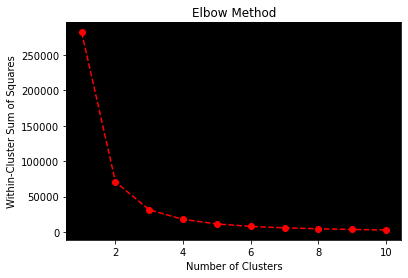

In [16]:
#elbow method
plt.plot(range(1,11),m,'--ro')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
axis=plt.gca()
axis.set_facecolor('k')
plt.show()

In [17]:
#creating k-means classifier
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
ymeans=kmeans.fit_predict(x)
ymeans

array([0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2,
       1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2,
       2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1,
       2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2,
       2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2,
       0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0])

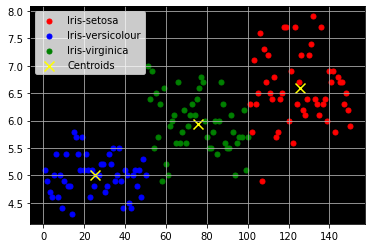

In [18]:
#visualizing data
plt.scatter(x[ymeans==0,0],x[ymeans==0,1],s=100,c='r',label='Iris-setosa',marker='.')
plt.scatter(x[ymeans==1,0],x[ymeans==1,1],s=100,c='b',label='Iris-versicolour',marker='.')
plt.scatter(x[ymeans==2,0],x[ymeans==2,1],s=100,c='g',label='Iris-virginica',marker='.')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids',marker='x')
plt.grid()
axis=plt.gca()
axis.set_facecolor('k')
plt.legend()

In [19]:
from sklearn.metrics import silhouette_score
s=silhouette_score(x,ymeans)
print(s)

0.5820898597618552
